# Import Libraries

In [1]:
import pandas as pd
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt
import os
import sys
import logging
from scipy import stats


sns.set_theme()

In [2]:
module_path =os.path.abspath(os.path.join('..'))
if module_path not in sys.path:
    sys.path.append(module_path+"\\scripts")

if module_path not in sys.path:
    sys.path.append(module_path+"\\model")



logging.basicConfig(filename='../logs/notebook.log', filemode='w', format='%(asctime)s - %(name)s - %(levelname)s - %(message)s',level=logging.DEBUG)


In [3]:
#import our self defined scripts
from dvc_data import DVCDATA
from univariate import UNIV

In [4]:
instance=DVCDATA()
traindata,dataurl,version=instance.get_data('pharmtec train','data/train.csv','https://github.com/Blvisse/Pharmtec_Sales',"'train-v1'")


Fetching data from Repo ... 

Converting into dataframe 



C:\ProgramData\Anaconda3\lib\site-packages\IPython\core\interactiveshell.py:3357: DtypeWarning: Columns (7) have mixed types.Specify dtype option on import or set low_memory=False.
  if (await self.run_code(code, result,  async_=asy)):


Logging data deatails to mlflow 

Done....


In [5]:
traindata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


In [6]:
instance=DVCDATA()
testdata,dataurl,version=instance.get_data('pharmtec test','data/test.csv','https://github.com/Blvisse/Pharmtec_Sales',"'test-v1'")

Fetching data from Repo ... 

Converting into dataframe 

Logging data deatails to mlflow 

Done....


In [7]:
testdata

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [8]:
storedata,dataurl,version=instance.get_data('pharmtec store','data/store.csv','https://github.com/Blvisse/Pharmtec_Sales',"'store-v1'")

Fetching data from Repo ... 

Converting into dataframe 

Logging data deatails to mlflow 

Done....


# EDA

Now that we got the data we create we need to do some analysis on the data

## Getting Duplicated values

In [9]:
from clean_data import CLEAN

In [10]:
cleanInstance=CLEAN(traindata)
cleanInstance.calculate_null()

The report of missing values is as follows


,Total Missing,Percentage Missing
Store,0.0,0.0
DayOfWeek,0.0,0.0
Date,0.0,0.0
Sales,0.0,0.0
Customers,0.0,0.0
Open,0.0,0.0
Promo,0.0,0.0
StateHoliday,0.0,0.0
SchoolHoliday,0.0,0.0


There seems to be no null values in the training dataset

In [11]:
cleanInstance=CLEAN(testdata)
cleanInstance.calculate_null()

The report of missing values is as follows


,Total Missing,Percentage Missing
Id,0.0,0.000000
Store,0.0,0.000000
DayOfWeek,0.0,0.000000
Date,0.0,0.000000
Open,11.0,0.026772
Promo,0.0,0.000000
StateHoliday,0.0,0.000000
SchoolHoliday,0.0,0.000000


We have a total of 11 missing values in the test data with all of them being in the open column 

In [12]:
cleanInstance=CLEAN(storedata)
cleanInstance.calculate_null()

The report of missing values is as follows


,Total Missing,Percentage Missing
Store,0.0,0.000000
StoreType,0.0,0.000000
Assortment,0.0,0.000000
CompetitionDistance,3.0,0.269058
CompetitionOpenSinceMonth,354.0,31.748879
CompetitionOpenSinceYear,354.0,31.748879
Promo2,0.0,0.000000
Promo2SinceWeek,544.0,48.789238
Promo2SinceYear,544.0,48.789238
PromoInterval,544.0,48.789238


We do have a couple of missing values in this row. We need to address them 

## Missing Data

In [13]:
# we have a look at the mssing data in the columns

### Competition Distance

In [14]:
storedata[storedata['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
290,291,d,a,NaN,NaN,NaN,0,NaN,NaN,NaN
621,622,a,c,NaN,NaN,NaN,0,NaN,NaN,NaN
878,879,d,a,NaN,NaN,NaN,1,5.0,2013.0,"Feb,May,Aug,Nov"


We see that the 3 throws that don't have details on competition distance also don't have details on competionOpenSinceMonth and CompetitionOpenSinceYear. We can fill in the missing values with the median value of the column instead of filling with zero which will be interprated as the competition is next to the store 

In [15]:
storedata['CompetitionDistance'].fillna(storedata['CompetitionDistance'].median(),inplace=True)

In [16]:
#check to see if they were resolved
storedata[storedata['CompetitionDistance'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### Copetition Open Since Year

In [17]:
storedata[storedata['CompetitionOpenSinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
11,12,a,c,1070.0,NaN,NaN,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
12,13,d,a,310.0,NaN,NaN,1,45.0,2009.0,"Feb,May,Aug,Nov"
15,16,a,c,3270.0,NaN,NaN,0,NaN,NaN,NaN
18,19,a,c,3240.0,NaN,NaN,1,22.0,2011.0,"Mar,Jun,Sept,Dec"
21,22,a,a,1040.0,NaN,NaN,1,22.0,2012.0,"Jan,Apr,Jul,Oct"
...,...,...,...,...,...,...,...,...,...,...
1095,1096,a,c,1130.0,NaN,NaN,1,10.0,2014.0,"Mar,Jun,Sept,Dec"
1099,1100,a,a,540.0,NaN,NaN,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
1112,1113,a,c,9260.0,NaN,NaN,0,NaN,NaN,NaN
1113,1114,a,c,870.0,NaN,NaN,0,NaN,NaN,NaN


Looking at the value we do see the competition distance is available and hence there exists a competitior and hence need to fill in the opensincemonth column we shall also impute this with median of the column and do the same for the year as well

In [18]:
storedata['CompetitionOpenSinceYear'].fillna(storedata['CompetitionOpenSinceYear'].median(),inplace=True)
storedata['CompetitionOpenSinceMonth'].fillna(storedata['CompetitionOpenSinceMonth'].median(),inplace=True)

In [19]:
#check to see if they were resolved
storedata[storedata['CompetitionOpenSinceMonth'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


### Promo 2 Since Week

In [20]:
storedata[storedata['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,NaN,NaN,NaN
3,4,c,c,620.0,9.0,2009.0,0,NaN,NaN,NaN
4,5,a,a,29910.0,4.0,2015.0,0,NaN,NaN,NaN
5,6,a,a,310.0,12.0,2013.0,0,NaN,NaN,NaN
6,7,a,c,24000.0,4.0,2013.0,0,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,NaN,NaN,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,NaN,NaN,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,NaN,NaN,NaN
1112,1113,a,c,9260.0,8.0,2010.0,0,NaN,NaN,NaN


Logically speaking if promo2 doesn't exist there shouldn't be a start or end week to it. So we begin by filling rows which had promo2 as 0 we impute with 0 as well 

In [21]:
storedata['Promo2SinceWeek']=np.where(storedata['Promo2'] == 0, 0,storedata['Promo2SinceWeek'])

In [22]:
storedata[storedata['Promo2SinceWeek'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


Seems to have solved our problem...we also apply it to the sinceyear column

In [23]:
storedata['Promo2SinceYear']=np.where(storedata['Promo2'] == 0, 0,storedata['Promo2SinceYear'])

In [24]:
storedata[storedata['Promo2SinceYear'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [25]:
storedata[storedata['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,NaN
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,NaN
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,NaN
5,6,a,a,310.0,12.0,2013.0,0,0.0,0.0,NaN
6,7,a,c,24000.0,4.0,2013.0,0,0.0,0.0,NaN
...,...,...,...,...,...,...,...,...,...,...
1107,1108,a,a,540.0,4.0,2004.0,0,0.0,0.0,NaN
1109,1110,c,c,900.0,9.0,2010.0,0,0.0,0.0,NaN
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,NaN
1112,1113,a,c,9260.0,8.0,2010.0,0,0.0,0.0,NaN


In [26]:
storedata['PromoInterval']=np.where(storedata['Promo2'] == 0, 0,storedata['PromoInterval'])

In [27]:
storedata[storedata['PromoInterval'].isnull()]

,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval


In [28]:
cleanInstance=CLEAN(storedata)
cleanInstance.calculate_null()

The report of missing values is as follows


,Total Missing,Percentage Missing
Store,0.0,0.0
StoreType,0.0,0.0
Assortment,0.0,0.0
CompetitionDistance,0.0,0.0
CompetitionOpenSinceMonth,0.0,0.0
CompetitionOpenSinceYear,0.0,0.0
Promo2,0.0,0.0
Promo2SinceWeek,0.0,0.0
Promo2SinceYear,0.0,0.0
PromoInterval,0.0,0.0


Done with that so we move on to the next dataset

### Open

In [29]:
testdata[testdata['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
479,480,622,4,2015-09-17,NaN,1,0,0
1335,1336,622,3,2015-09-16,NaN,1,0,0
2191,2192,622,2,2015-09-15,NaN,1,0,0
3047,3048,622,1,2015-09-14,NaN,1,0,0
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0


Logically speaking you can't run a promo while a store is closed hence we fill in those with 1 indicatinf the store is open

In [30]:
testdata['Open']=np.where(testdata['Promo'] == 1, 1,testdata['Open'])

In [31]:
testdata[testdata['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
4759,4760,622,6,2015-09-12,NaN,0,0,0
5615,5616,622,5,2015-09-11,NaN,0,0,0
6471,6472,622,4,2015-09-10,NaN,0,0,0
7327,7328,622,3,2015-09-09,NaN,0,0,0
8183,8184,622,2,2015-09-08,NaN,0,0,0
9039,9040,622,1,2015-09-07,NaN,0,0,0
10751,10752,622,6,2015-09-05,NaN,0,0,0


For the remaining ones we fill in with zeros indicating that the shop might have been closed

In [32]:
testdata['Open']=np.where(testdata['Open'].isnull() , 0,testdata['Open'])

In [33]:
testdata[testdata['Open'].isnull()]

,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday


We are done with that 

#### Save cleaned data sets

In [34]:
testdata.to_csv('../data/clean_test.csv',index=False)
storedata.to_csv('../data/clean_store.csv',index=False)

We then store this data on our dvc repo where we can access it anytime

## Check for duplicates

In [35]:
cleanInstance=CLEAN(storedata)
cleanInstance.dropDuplicates()



Droppping duplicates

There are 0 duplicates in the dataset

Done dropping duplicates! 



,Store,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...
1110,1111,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1111,1112,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1112,1113,a,c,9260.0,8.0,2010.0,0,0.0,0.0,0
1113,1114,a,c,870.0,8.0,2010.0,0,0.0,0.0,0


In [36]:
cleanInstance=CLEAN(testdata)
cleanInstance.dropDuplicates()

Droppping duplicates

There are 0 duplicates in the dataset

Done dropping duplicates! 



,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday
0,1,1,4,2015-09-17,1.0,1,0,0
1,2,3,4,2015-09-17,1.0,1,0,0
2,3,7,4,2015-09-17,1.0,1,0,0
3,4,8,4,2015-09-17,1.0,1,0,0
4,5,9,4,2015-09-17,1.0,1,0,0
...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0
41084,41085,1112,6,2015-08-01,1.0,0,0,0
41085,41086,1113,6,2015-08-01,1.0,0,0,0
41086,41087,1114,6,2015-08-01,1.0,0,0,0


In [37]:
cleanInstance=CLEAN(traindata)
cleanInstance.dropDuplicates()

Droppping duplicates

There are 0 duplicates in the dataset

Done dropping duplicates! 



,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday
0,1,5,2015-07-31,5263,555,1,1,0,1
1,2,5,2015-07-31,6064,625,1,1,0,1
2,3,5,2015-07-31,8314,821,1,1,0,1
3,4,5,2015-07-31,13995,1498,1,1,0,1
4,5,5,2015-07-31,4822,559,1,1,0,1
...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1


# Feature Eng

In [38]:
# We begin by ensuring all data types are okay
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype 
---  ------         --------------    ----- 
 0   Store          1017209 non-null  int64 
 1   DayOfWeek      1017209 non-null  int64 
 2   Date           1017209 non-null  object
 3   Sales          1017209 non-null  int64 
 4   Customers      1017209 non-null  int64 
 5   Open           1017209 non-null  int64 
 6   Promo          1017209 non-null  int64 
 7   StateHoliday   1017209 non-null  object
 8   SchoolHoliday  1017209 non-null  int64 
dtypes: int64(7), object(2)
memory usage: 69.8+ MB


In [39]:
#we convert the date column into an ppropriate format and data type
traindata['Date']=pd.to_datetime(traindata['Date'])

In [40]:
traindata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1017209 entries, 0 to 1017208
Data columns (total 9 columns):
 #   Column         Non-Null Count    Dtype         
---  ------         --------------    -----         
 0   Store          1017209 non-null  int64         
 1   DayOfWeek      1017209 non-null  int64         
 2   Date           1017209 non-null  datetime64[ns]
 3   Sales          1017209 non-null  int64         
 4   Customers      1017209 non-null  int64         
 5   Open           1017209 non-null  int64         
 6   Promo          1017209 non-null  int64         
 7   StateHoliday   1017209 non-null  object        
 8   SchoolHoliday  1017209 non-null  int64         
dtypes: datetime64[ns](1), int64(7), object(1)
memory usage: 69.8+ MB


In [41]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             41088 non-null  int64  
 1   Store          41088 non-null  int64  
 2   DayOfWeek      41088 non-null  int64  
 3   Date           41088 non-null  object 
 4   Open           41088 non-null  float64
 5   Promo          41088 non-null  int64  
 6   StateHoliday   41088 non-null  object 
 7   SchoolHoliday  41088 non-null  int64  
dtypes: float64(1), int64(5), object(2)
memory usage: 2.5+ MB


In [42]:
#we do the same for the date column on test data
testdata['Date']=pd.to_datetime(testdata['Date'])

In [43]:
testdata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41088 entries, 0 to 41087
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   Id             41088 non-null  int64         
 1   Store          41088 non-null  int64         
 2   DayOfWeek      41088 non-null  int64         
 3   Date           41088 non-null  datetime64[ns]
 4   Open           41088 non-null  float64       
 5   Promo          41088 non-null  int64         
 6   StateHoliday   41088 non-null  object        
 7   SchoolHoliday  41088 non-null  int64         
dtypes: datetime64[ns](1), float64(1), int64(5), object(1)
memory usage: 2.5+ MB


In [44]:
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


We can squeeze out a couple of new columns that will be of help in exploring and training our data

In [45]:
traindata['Week']=pd.DatetimeIndex(traindata['Date']).week

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [46]:
traindata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week
0,1,5,2015-07-31,5263,555,1,1,0,1,31
1,2,5,2015-07-31,6064,625,1,1,0,1,31
2,3,5,2015-07-31,8314,821,1,1,0,1,31
3,4,5,2015-07-31,13995,1498,1,1,0,1,31
4,5,5,2015-07-31,4822,559,1,1,0,1,31
...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1


In [47]:
testdata['Week']=pd.DatetimeIndex(testdata['Date']).week

C:\ProgramData\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: weekofyear and week have been deprecated, please use DatetimeIndex.isocalendar().week instead, which returns a Series.  To exactly reproduce the behavior of week and weekofyear and return an Index, you may call pd.Int64Index(idx.isocalendar().week)
  """Entry point for launching an IPython kernel.


In [48]:
testdata


,Id,Store,DayOfWeek,Date,Open,Promo,StateHoliday,SchoolHoliday,Week
0,1,1,4,2015-09-17,1.0,1,0,0,38
1,2,3,4,2015-09-17,1.0,1,0,0,38
2,3,7,4,2015-09-17,1.0,1,0,0,38
3,4,8,4,2015-09-17,1.0,1,0,0,38
4,5,9,4,2015-09-17,1.0,1,0,0,38
...,...,...,...,...,...,...,...,...,...
41083,41084,1111,6,2015-08-01,1.0,0,0,0,31
41084,41085,1112,6,2015-08-01,1.0,0,0,0,31
41085,41086,1113,6,2015-08-01,1.0,0,0,0,31
41086,41087,1114,6,2015-08-01,1.0,0,0,0,31


In [49]:
#We can calculate the the avaregae sales per customer to understand the data better
traindata['Sales_per_Customer']=traindata['Sales']/traindata['Customers']
traindata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week,Sales_per_Customer
0,1,5,2015-07-31,5263,555,1,1,0,1,31,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,31,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,31,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,31,8.626118
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,NaN
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,NaN
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,NaN
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,NaN


In [50]:
#if by chance we have no customer hence no sales we should have zero as the sales_per_customer
traindata['Sales_per_Customer'].fillna(0,inplace=True)
traindata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week,Sales_per_Customer
0,1,5,2015-07-31,5263,555,1,1,0,1,31,9.482883
1,2,5,2015-07-31,6064,625,1,1,0,1,31,9.702400
2,3,5,2015-07-31,8314,821,1,1,0,1,31,10.126675
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,9.342457
4,5,5,2015-07-31,4822,559,1,1,0,1,31,8.626118
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,0.000000
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,0.000000
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,0.000000
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,0.000000


In [51]:
#we convert the column into two decimal places for redabitlity purposes
traindata['Sales_per_Customer']=traindata['Sales_per_Customer'].apply(lambda x: format(x,".2f"))

In [52]:
traindata

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week,Sales_per_Customer
0,1,5,2015-07-31,5263,555,1,1,0,1,31,9.48
1,2,5,2015-07-31,6064,625,1,1,0,1,31,9.70
2,3,5,2015-07-31,8314,821,1,1,0,1,31,10.13
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,9.34
4,5,5,2015-07-31,4822,559,1,1,0,1,31,8.63
...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,0.00
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,0.00
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,0.00
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,0.00


## Sales

In [53]:
uniInstance=UNIV(traindata)
uniInstance.calculateMetrics('Sales')



---- Reading data ----
--- Done ---

--- Calculating the univariate metrics of the columns Sales --- 
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,5773.818972
Mode,[0]
Median,5744.0
Skew,0.641459
Kurtosis,1.77836
Standard deviation,3849.924283
Variance,14821916.983582


In [54]:
uniInstance.calculateDispersion('Sales')

Calculating dispersion stats for Sales
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,3727.000000
Q2,5744.000000
Q3,7856.000000
Std deviation,3849.924283
IQR,4129.000000
Max Value,41551.000000
Min Value,0.000000


The average of sales is 5773.81 

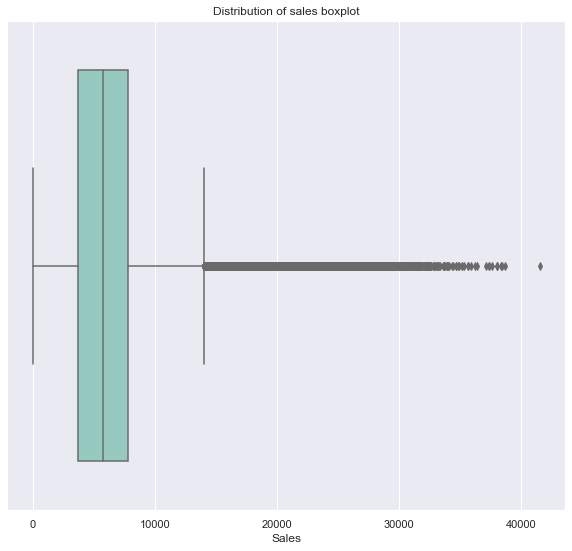

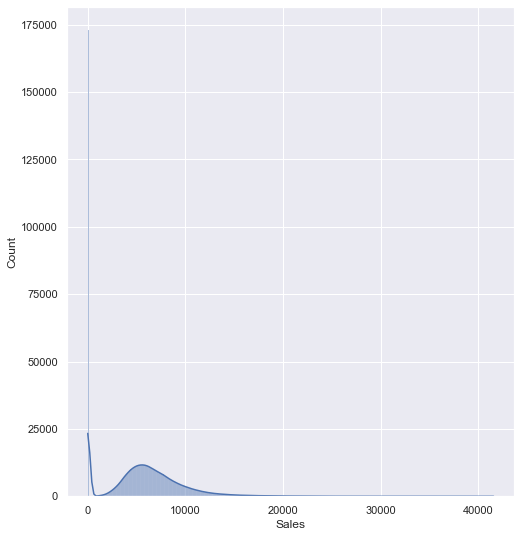

In [55]:
def boxplots(data,col,pal,title, **kwargs):
    plt.figure( **kwargs)
    ax=sns.boxplot(x=data[col],palette=pal)
    plt.title(title)
def histplot(data,col, **plot):
    plt.figure(**plot)
    sns.histplot(data=data, x=col,kde=True)


boxplots(traindata,'Sales','Set3',"Distribution of sales boxplot",figsize=(10,9))
histplot(traindata,'Sales',figsize=(8,9))

    

The histogram picks up a huge desnity of 0 sales this needs to be investiagted. 

 *   Then the long tail on the right are the outliers which interprate to extreme sales/purchases.Our assumptions is that the sales can be due to promotions or holidays that push users to spending more 
 
 * The 0 sales can be due to shop closure, this is because some shops had to undergo maintenance and some don't open on all days
 
* The mean of 5773.74 versus the median 5744 w


## Customers

In [56]:
uniInstance.calculateMetrics('Customers')

---- Reading data ----
--- Done ---

--- Calculating the univariate metrics of the columns Customers --- 
Converting the data into numpy arrays
Done!
Calculating mean....
Calculating Mode...
Calculating Median...
Calculating skeweness...
Calculating kurtosis...
Calculating standard deviation....
Calculating variance ...
Done !


,Analysis Values
Mean,633.145946
Mode,[0]
Median,609.0
Skew,1.598648
Kurtosis,7.091732
Standard deviation,464.411506
Variance,215678.046542


The average number of customer per store is 633 people we do note that some stores have 0 customers on some days which reflect to the closure of the store 

In [57]:
uniInstance.calculateDispersion('Customers')

Calculating dispersion stats for Customers
Calculating Standard Deviation
Calculating Inter Quartile Range
Caclulating Max 
Done....
 
Creating DataFrame


,Dispersion Values
Q1,405.000000
Q2,609.000000
Q3,837.000000
Std deviation,464.411506
IQR,432.000000
Max Value,7388.000000
Min Value,0.000000


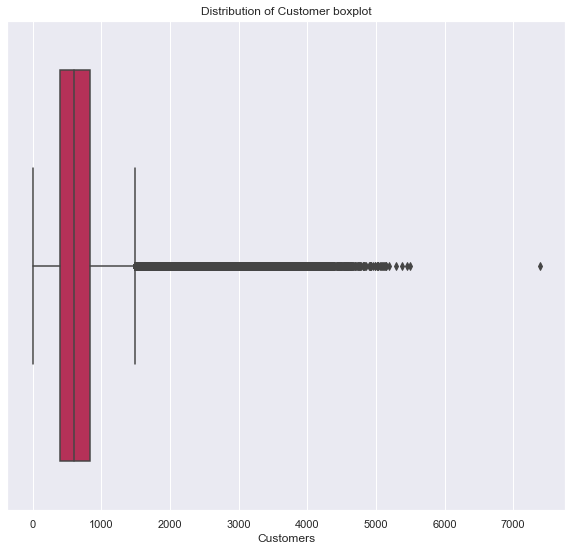

In [58]:
boxplots(traindata,'Customers','rocket',"Distribution of Customer boxplot",figsize=(10,9))


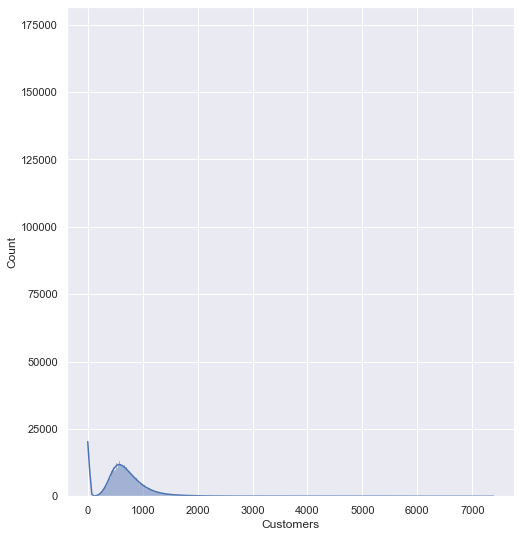

In [59]:
histplot(traindata,'Customers',figsize=(8,9))

**Are Customers and Sales correlated ?**

In [60]:
stats.pearsonr(traindata.Customers, traindata.Sales)[0]

0.8947107733017134

The high pearsons correlation reflect a high correlation between customers and sales: An increase in number of customers will lead to an increase to a number of sales

## Stores

In [61]:
storedata.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1115 entries, 0 to 1114
Data columns (total 10 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Store                      1115 non-null   int64  
 1   StoreType                  1115 non-null   object 
 2   Assortment                 1115 non-null   object 
 3   CompetitionDistance        1115 non-null   float64
 4   CompetitionOpenSinceMonth  1115 non-null   float64
 5   CompetitionOpenSinceYear   1115 non-null   float64
 6   Promo2                     1115 non-null   int64  
 7   Promo2SinceWeek            1115 non-null   float64
 8   Promo2SinceYear            1115 non-null   float64
 9   PromoInterval              1115 non-null   object 
dtypes: float64(5), int64(2), object(3)
memory usage: 87.2+ KB


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Store Types')

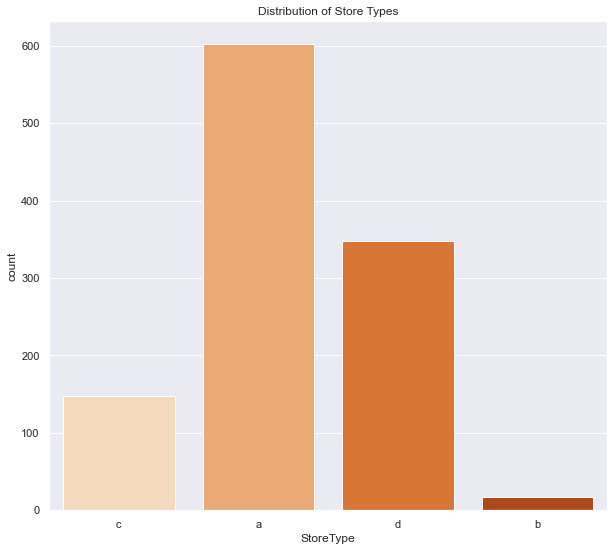

In [62]:
plt.figure(figsize=(10,9))
sns.countplot(storedata['StoreType'],palette="Oranges")
plt.title("Distribution of Store Types")

In [63]:
storedata.groupby(['StoreType']).agg({'StoreType': 'count'})

,StoreType
StoreType,
a,602
b,17
c,148
d,348


Most stores fall under the a category we could probably investigate further to understand which type of store this might be

* Store B has the lowest frequency with only 17 stores being of type b

### Assortment

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Distribution of Assortment Store Types')

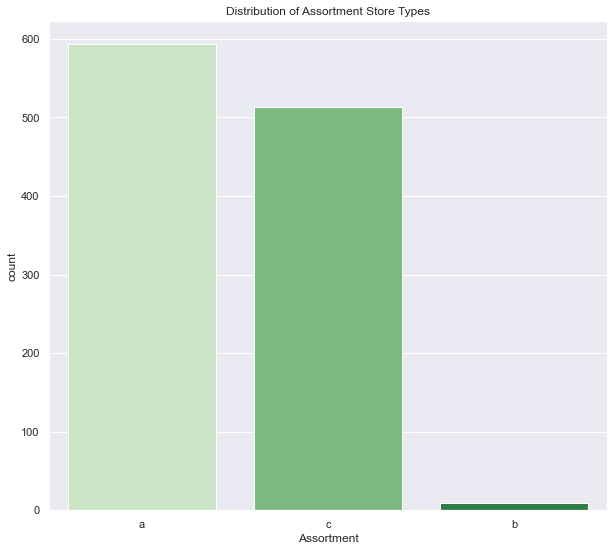

In [64]:
plt.figure(figsize=(10,9))
sns.countplot(storedata['Assortment'],palette="Greens")
plt.title("Distribution of Assortment Store Types")

In [65]:
storedata.groupby(['Assortment']).agg({'Assortment': 'count'})

,Assortment
Assortment,
a,593
b,9
c,513


Most of the stores are uder assorment a - Basic . We can probably inteprate this as the wide assortment, thus gives/provides a large  variety of goods 

* Assortment c is extended 
* Assortment b is extra  We can categorize this as deep assotment stores, they aim to provide a large number of portions on a particular category. This can be bookshops, pharmacies etc

We now merge all our data so as to conduct proper bivariate analysis

In [66]:
train=pd.merge(traindata,storedata,how='left',on='Store')

In [67]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week,Sales_per_Customer,StoreType,Assortment,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval
0,1,5,2015-07-31,5263,555,1,1,0,1,31,9.48,c,a,1270.0,9.0,2008.0,0,0.0,0.0,0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,9.70,a,a,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct"
2,3,5,2015-07-31,8314,821,1,1,0,1,31,10.13,a,a,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct"
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,9.34,c,c,620.0,9.0,2009.0,0,0.0,0.0,0
4,5,5,2015-07-31,4822,559,1,1,0,1,31,8.63,a,a,29910.0,4.0,2015.0,0,0.0,0.0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,0.00,a,a,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct"
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,0.00,c,c,1880.0,4.0,2006.0,0,0.0,0.0,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,0.00,a,c,9260.0,8.0,2010.0,0,0.0,0.0,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,0.00,a,c,870.0,8.0,2010.0,0,0.0,0.0,0


In [68]:
# Save and version this data

train.to_csv("../data/masterdata.csv",index=False)

In [121]:
train['Month']=pd.DatetimeIndex(train['Date']).month
train['Year']=pd.DatetimeIndex(train['Date']).year


## Bivariate Anlysis

### Sales per week

In [70]:
train.groupby(['Week']).agg({'Sales':sum})

,Sales
Week,
1,94413272
2,148779641
3,119688138
4,131021290
5,127937121
6,152296502
7,114073109
8,145147370
9,117448723


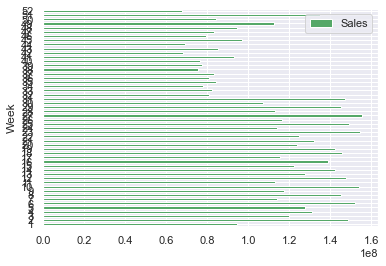

In [71]:

train.groupby(['Week']).agg({'Sales':sum}).plot(kind='barh',color='g')


In [72]:
train.groupby(['Week']).agg({'Sales':sum}).sort_values(by='Sales',ascending=False).head(10)

,Sales
Week,
27,155398494
23,154335348
10,153992960
6,152296502
25,149158794
2,148779641
12,147513328
31,147063079
18,145971156


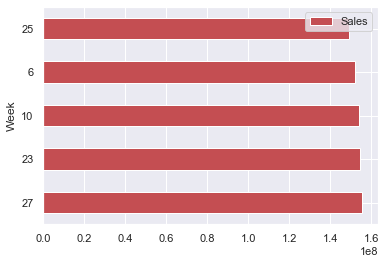

In [73]:
train.groupby(['Week']).agg({'Sales':sum}).sort_values(by='Sales',ascending=False).head(5).plot(kind='barh',color='r')

The 25th week of the year seems to generate the most sales during the year, the top 5 sales come arount 23-28 week of the year, where we see a surge in sales 

In [74]:
train.groupby(['Week']).agg({'Sales':sum}).sort_values(by='Sales').head(10)

,Sales
Week,
52,67657203
42,68177653
44,69353456
38,75678442
40,76608603
39,77540096
34,77930481
46,79598223
36,80838566


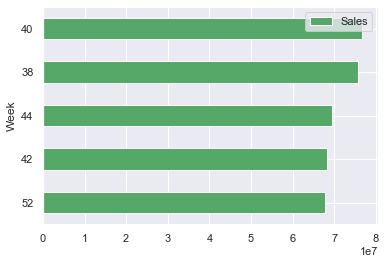

In [75]:
train.groupby(['Week']).agg({'Sales':sum}).sort_values(by='Sales').head(5).plot(kind='barh',color='g')

We experience a decline in sales  as from the 40 th week through to the 46th. The last week of the year has the least number of sales

### Customers Per Week

In [76]:
train.groupby(['Week']).agg({'Customers':sum})

,Customers
Week,
1,10811519
2,15488606
3,13727165
4,14298226
5,14195037
6,15927605
7,13681706
8,15327682
9,13843185


**Top Customer Intergactions per month**

In [77]:
train.groupby(['Week']).agg({'Sales':sum}).sort_values(by='Sales',ascending=False).head(10)

,Sales
Week,
27,155398494
23,154335348
10,153992960
6,152296502
25,149158794
2,148779641
12,147513328
31,147063079
18,145971156


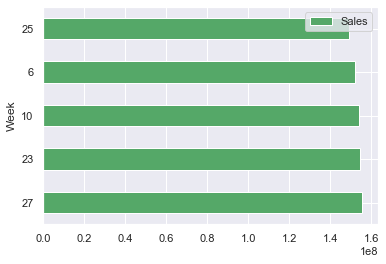

In [78]:
train.groupby(['Week']).agg({'Sales':sum}).sort_values(by='Sales',ascending=False).head(5).plot(kind='barh',color='g')

In [79]:
train.groupby(['Week']).agg({'Customers':sum}).sort_values(by='Customers').head(10)

,Customers
Week,
52,7391819
44,8261369
42,8350052
40,8536541
38,8855655
39,8934799
34,8975472
46,9059947
32,9160705


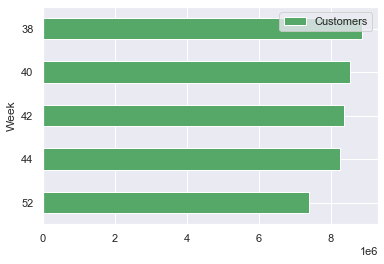

In [80]:
train.groupby(['Week']).agg({'Customers':sum}).sort_values(by='Customers').head(5).plot(kind='barh',color='g')

## Assortment type per Store type

In [120]:
train.groupby(['StoreType']).agg({'Assortment':'count'})

,Assortment
StoreType,
a,551627
b,15830
c,136840
d,312912


In [119]:
train.groupby(['StoreType','Assortment']).agg({'Assortment':'count'})

Assortment
StoreType Assortment            
a         a               346389
          c               205238
b         a                 6594
          b                 8294
          c                  942
c         a                70878
          c                65962
d         a               113584
          c               199328

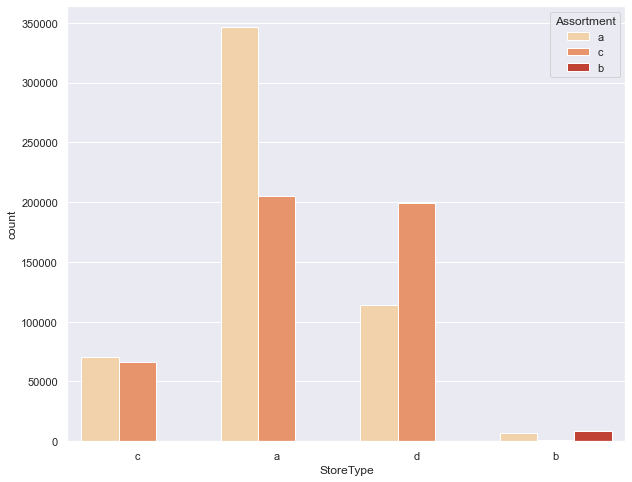

In [118]:
plt.figure(figsize=(10,8))
sns.countplot(data=train,x='StoreType',hue='Assortment',palette='OrRd')

We notice that most diverese store type is a and b which have a large number of assorted stores
We also see that assorted store b is only found in b store types

## Sales per Month

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


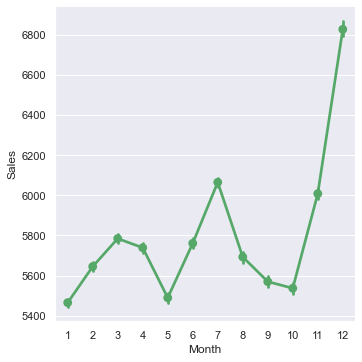

In [81]:
sns.factorplot(data = train, x ="Month", y = "Sales",color='g')

Text(0.5, 1.0, 'Sales per Month')

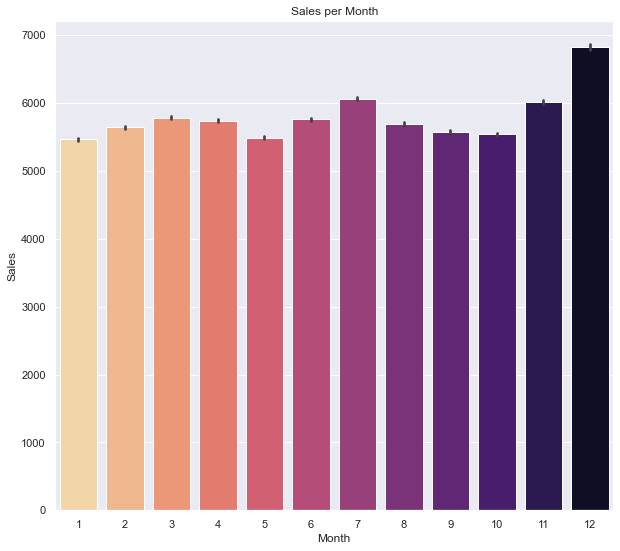

In [82]:
plt.figure(figsize=(10,9))
sns.barplot(x='Month',y='Sales',data=train,palette='magma_r')
plt.title("Sales per Month")

Decemeber records the highest Number of Sales during the year 

Text(0.5, 1.0, 'Sales per Month per Year')

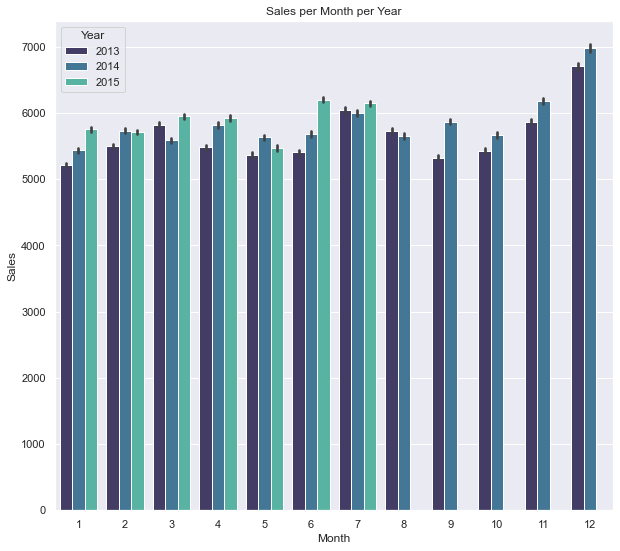

In [83]:
plt.figure(figsize=(10,9))
sns.barplot(x='Month',y='Sales',data=train,palette='mako',hue='Year')
plt.title("Sales per Month per Year")

In almost all months sales increased in the month of 2015 s compared to the previous two years. It is safe to say we do expect this trend to continue into the last 4 months of the year

## Sales per Customer / Month

In [84]:
train['Sales_per_Customer']=pd.to_numeric(train['Sales_per_Customer'],errors='coerce')

In [85]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1017209 entries, 0 to 1017208
Data columns (total 22 columns):
 #   Column                     Non-Null Count    Dtype         
---  ------                     --------------    -----         
 0   Store                      1017209 non-null  int64         
 1   DayOfWeek                  1017209 non-null  int64         
 2   Date                       1017209 non-null  datetime64[ns]
 3   Sales                      1017209 non-null  int64         
 4   Customers                  1017209 non-null  int64         
 5   Open                       1017209 non-null  int64         
 6   Promo                      1017209 non-null  int64         
 7   StateHoliday               1017209 non-null  object        
 8   SchoolHoliday              1017209 non-null  int64         
 9   Week                       1017209 non-null  int64         
 10  Sales_per_Customer         1017209 non-null  float64       
 11  StoreType                  1017209 no

In [86]:
train.groupby(['Month']).agg({'Sales_per_Customer':sum})

,Sales_per_Customer
Month,
1,815681.60
2,753222.70
3,821593.87
4,773922.04
5,763998.79
6,792632.93
7,824888.69
8,503369.94
9,477714.64


Text(0.5, 1.0, 'Sales per Customer Per Month')

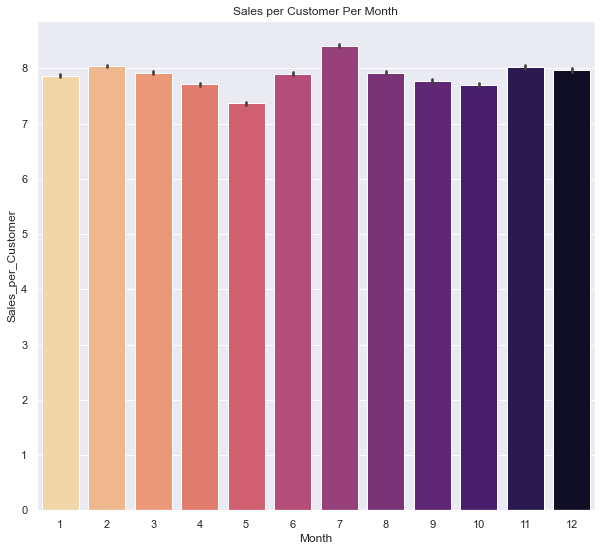

In [87]:
plt.figure(figsize=(10,9))
sns.barplot(x='Month',y='Sales_per_Customer',data=train,palette='magma_r')
plt.title("Sales per Customer Per Month")

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


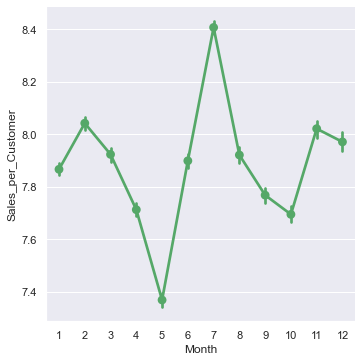

In [88]:
sns.factorplot(data = train, x ="Month", y = "Sales_per_Customer",color='g')

We do note that on the fifth month sales per customer drops

### Sales Per Customer during promos?

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


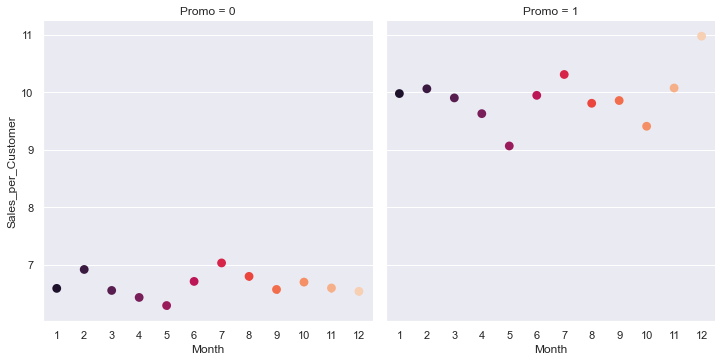

In [89]:
sns.factorplot(data = train, x ="Month", y = "Sales_per_Customer",col = 'Promo',sharex=False,palette='rocket')

Text(0.5, 1.0, 'Sales/Customer Per Month during promos')

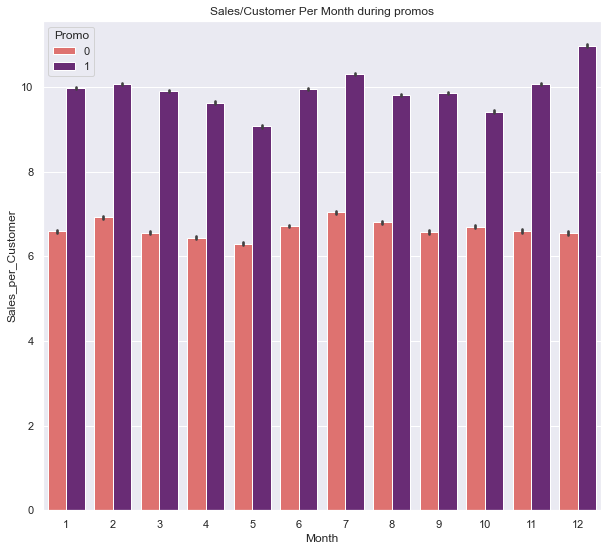

In [90]:
plt.figure(figsize=(10,9))
sns.barplot(x='Month',y='Sales_per_Customer',hue='Promo',data=train,palette='magma_r')
plt.title("Sales/Customer Per Month during promos")

Sales per customer do increase drastically during days where promotions are run 

### Promos vs Sales

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


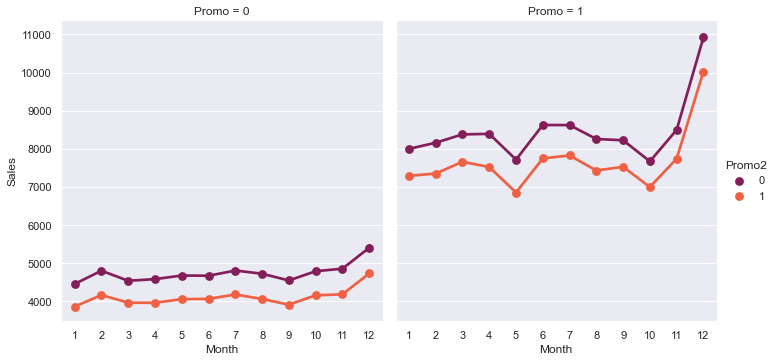

In [91]:
sns.factorplot(data = train, x ="Month", y = "Sales",col = 'Promo',hue = 'Promo2',sharex=False,palette='rocket')

We can clearly see that when stores run promos they have significant improvment in sales than those who don't Epsecially in the last month of the year the sales skyrocket in stores that run the promos

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


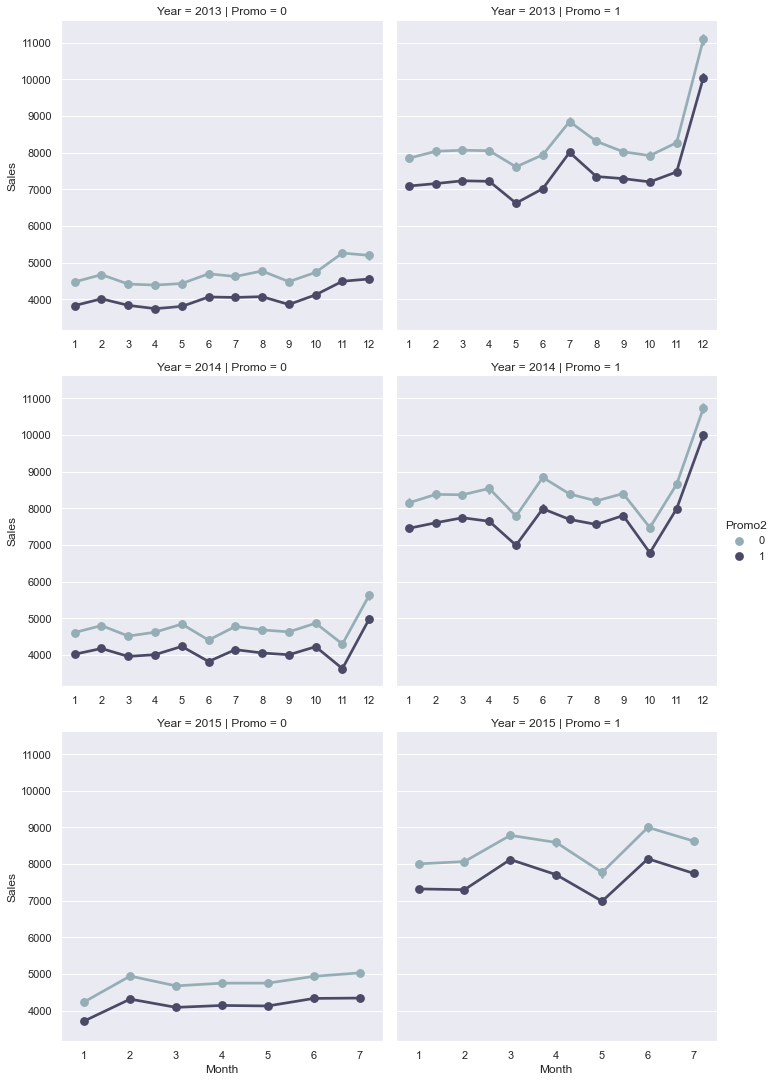

In [92]:
sns.factorplot(data = train, x ="Month", y = "Sales", row='Year',col = 'Promo',hue = 'Promo2',sharex=False,palette='bone_r')

There seems to be a dip in the 5th Month of every year  

### Store Type per Assortment

### Store Type per Sales

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

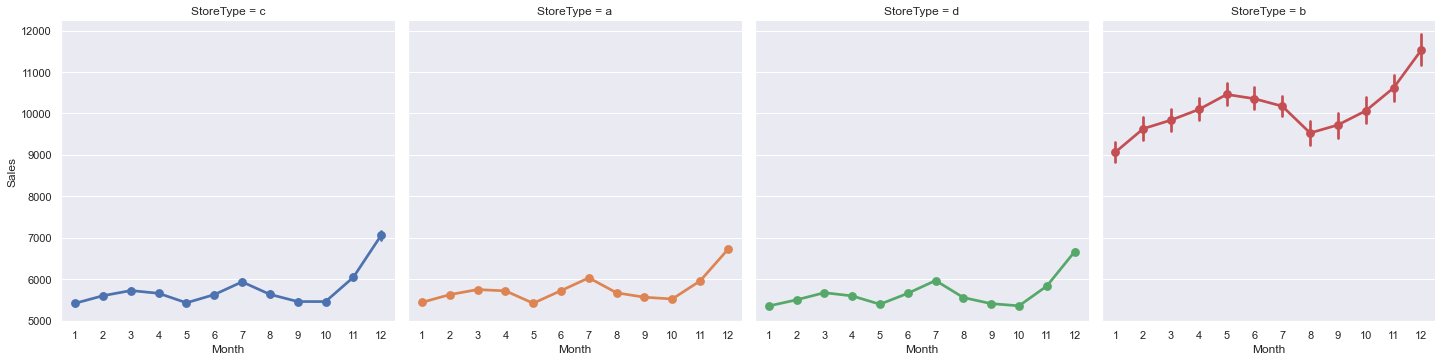

In [93]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',y='Sales',col='StoreType',hue='StoreType')


Seems like stores of type b have more sales every month

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

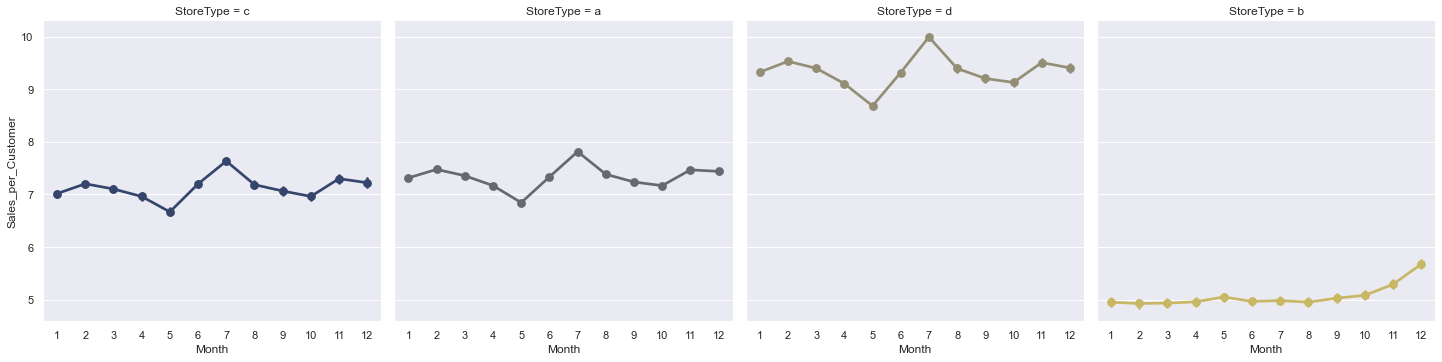

In [94]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',y='Sales_per_Customer',col='StoreType',hue='StoreType',palette='cividis')


C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

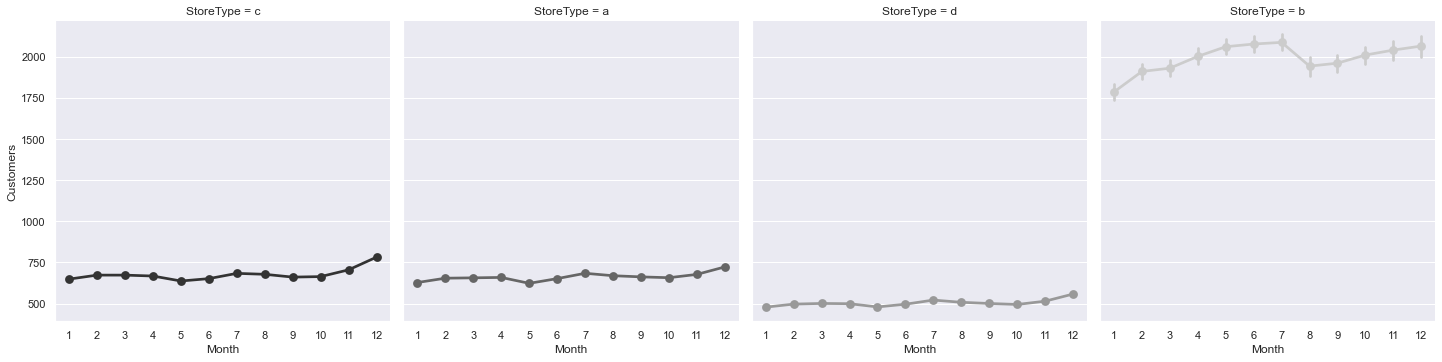

In [95]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',y='Customers',col='StoreType',hue='StoreType',palette='gray')


We see funny relation as store type b had the highest number of sales generally of the four stores, however they do have the least amount of sales per customer. It has the highest number of customers compared to any other store. We can assume that its a convinent store/supermarket hence the high numbers of customer. Though they do have the least amount of sales per customers, the high number interprates to high sales.


Type d stores have the least customer count but highest sales per customer This can be a specific type of high end store which has pricey goods hence why it generates the most of revenue regardless of the amount the customers and also why it has the highest sales per customer

Stores c and B and pretty much the same on these metrics

## Sales per Day for Stores

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

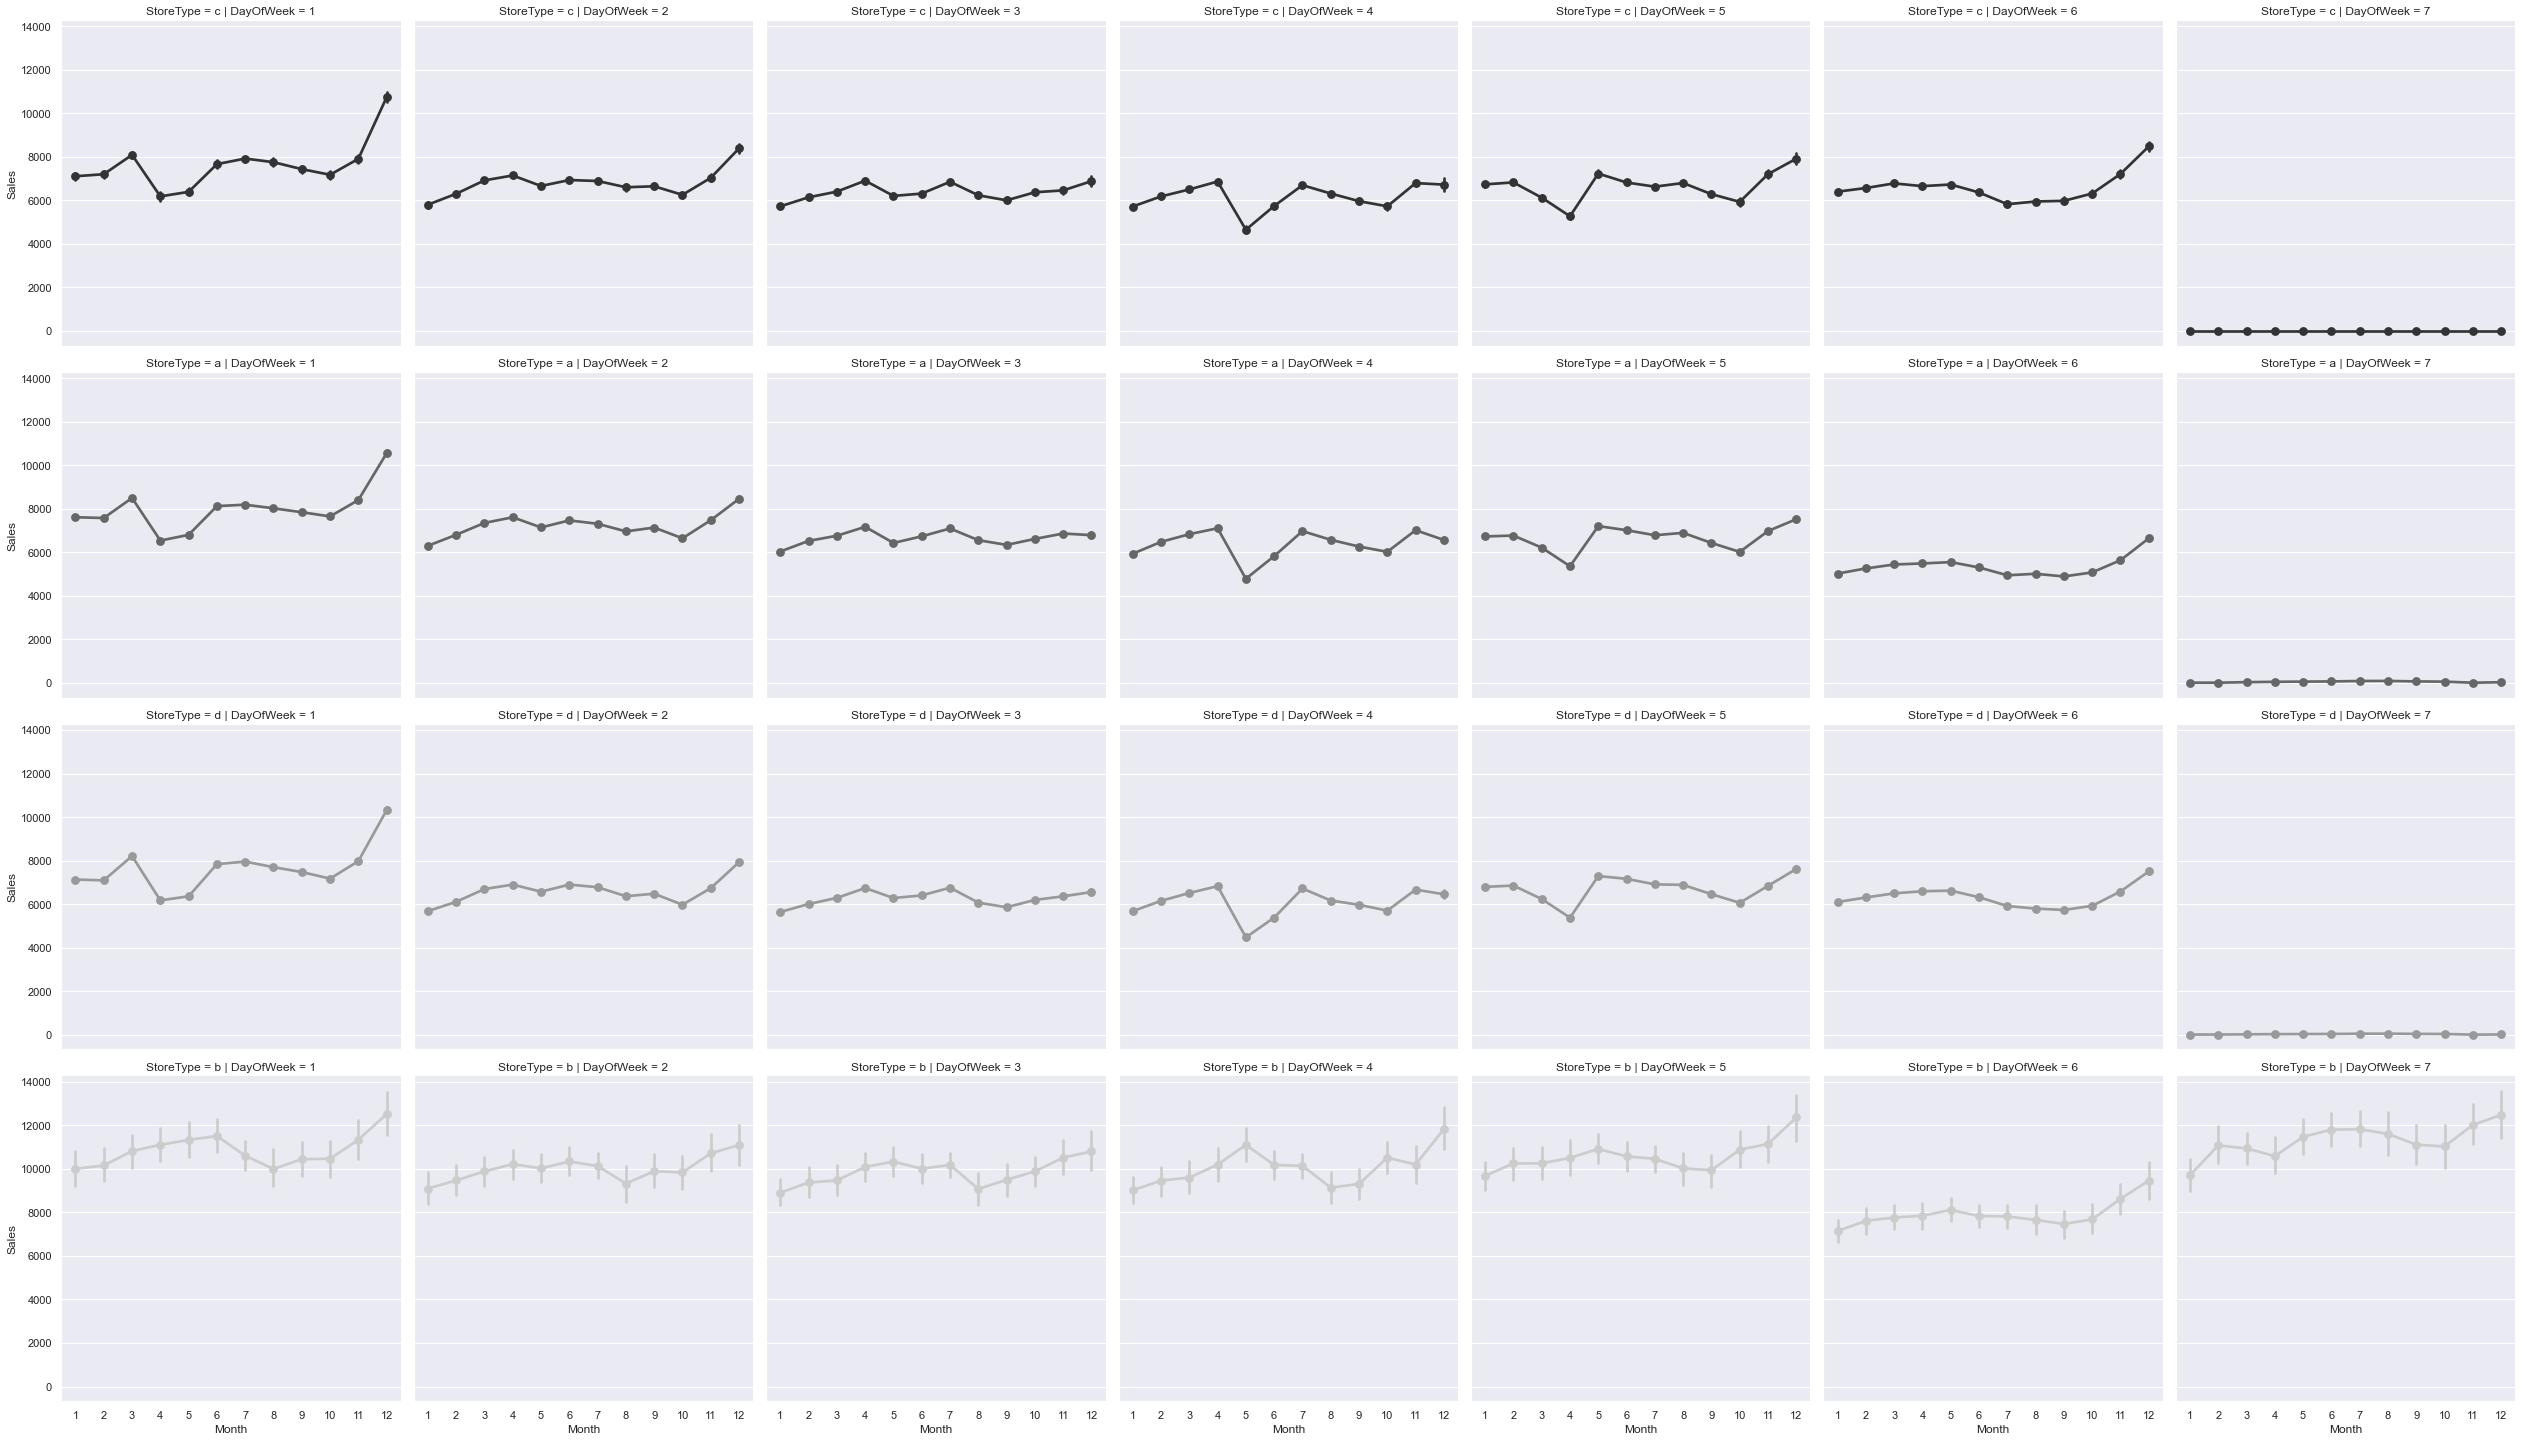

In [96]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',y='Sales',col='DayOfWeek',hue='StoreType',row='StoreType',palette='gray')


We find an interesting fact on the data, Only stores of type B are open on Sundays, the rest are usually closed
Lets calculate the number of stores that are actually open on sunday



In [100]:
openSun=train[(train['DayOfWeek']==7) & train['Open']==1]

In [109]:
train.groupby(['DayOfWeek']).agg({'Open':sum,'Sales':sum})

,Open,Sales
DayOfWeek,,
1,137560,1130203012
2,143961,1020411930
3,141936,954962863
4,134644,911177709
5,138640,980555941
6,144058,846317735
7,3593,29551433


3593 Stores are opened on Sundays 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

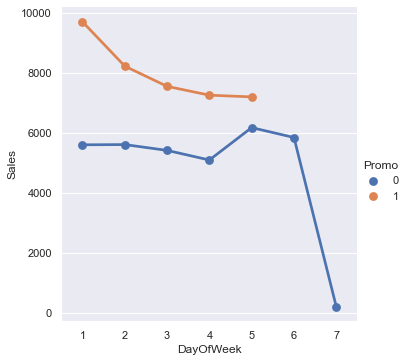

In [98]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='DayOfWeek',y="Sales",hue="Promo",sharex=False)

* We notice a decline in sales on sundays in general, thats understandale as fewer stores are open and hence reduced number of sales

* Mondays are the most profitable days to run promos as sales during promos on mondays attract more sales. 

* We can see that no promos are actually conducted on Sunday 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

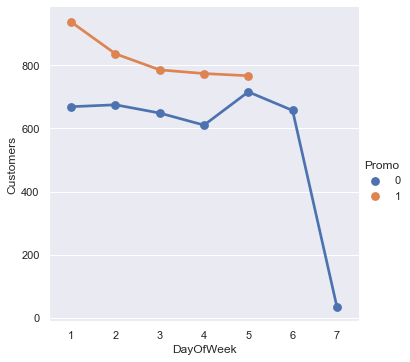

In [110]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='DayOfWeek',y="Customers",hue="Promo",sharex=False)

* The number of customers drastically increases on Monday this explains how we get a spike on Sales on Mondays. This is true for days with promos

##  Holidays vs Sales

How do sales stack up during holidays vs none holidays?

In [124]:
train

,Store,DayOfWeek,Date,Sales,Customers,Open,Promo,StateHoliday,SchoolHoliday,Week,...,CompetitionDistance,CompetitionOpenSinceMonth,CompetitionOpenSinceYear,Promo2,Promo2SinceWeek,Promo2SinceYear,PromoInterval,Month,Year,Hour
0,1,5,2015-07-31,5263,555,1,1,0,1,31,...,1270.0,9.0,2008.0,0,0.0,0.0,0,7,2015,0
1,2,5,2015-07-31,6064,625,1,1,0,1,31,...,570.0,11.0,2007.0,1,13.0,2010.0,"Jan,Apr,Jul,Oct",7,2015,0
2,3,5,2015-07-31,8314,821,1,1,0,1,31,...,14130.0,12.0,2006.0,1,14.0,2011.0,"Jan,Apr,Jul,Oct",7,2015,0
3,4,5,2015-07-31,13995,1498,1,1,0,1,31,...,620.0,9.0,2009.0,0,0.0,0.0,0,7,2015,0
4,5,5,2015-07-31,4822,559,1,1,0,1,31,...,29910.0,4.0,2015.0,0,0.0,0.0,0,7,2015,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1017204,1111,2,2013-01-01,0,0,0,0,a,1,1,...,1900.0,6.0,2014.0,1,31.0,2013.0,"Jan,Apr,Jul,Oct",1,2013,0
1017205,1112,2,2013-01-01,0,0,0,0,a,1,1,...,1880.0,4.0,2006.0,0,0.0,0.0,0,1,2013,0
1017206,1113,2,2013-01-01,0,0,0,0,a,1,1,...,9260.0,8.0,2010.0,0,0.0,0.0,0,1,2013,0
1017207,1114,2,2013-01-01,0,0,0,0,a,1,1,...,870.0,8.0,2010.0,0,0.0,0.0,0,1,2013,0


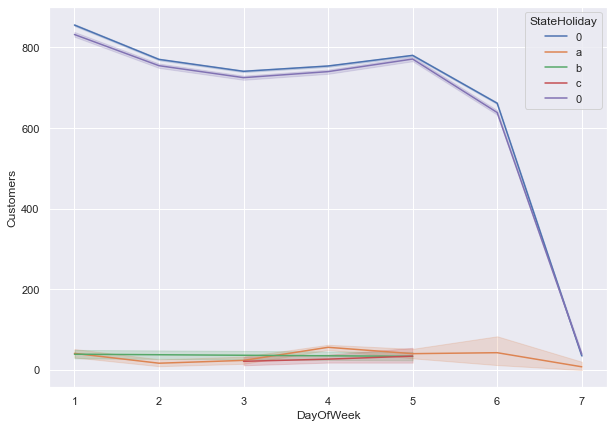

In [127]:
plt.figure(figsize=(10,7))
sns.lineplot(data=train,x='DayOfWeek',y='Customers',hue='StateHoliday')

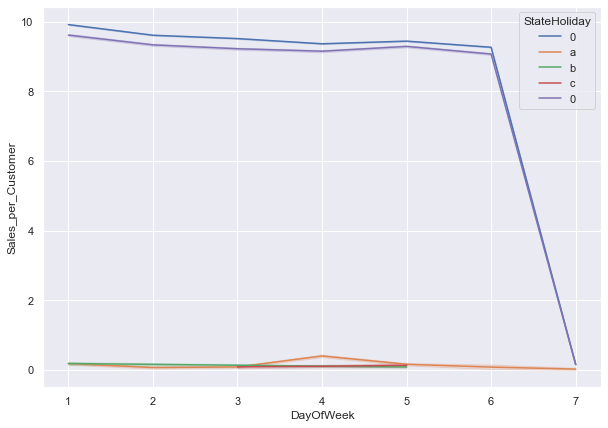

In [128]:
plt.figure(figsize=(10,7))
sns.lineplot(data=train,x='DayOfWeek',y='Sales_per_Customer',hue='StateHoliday')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

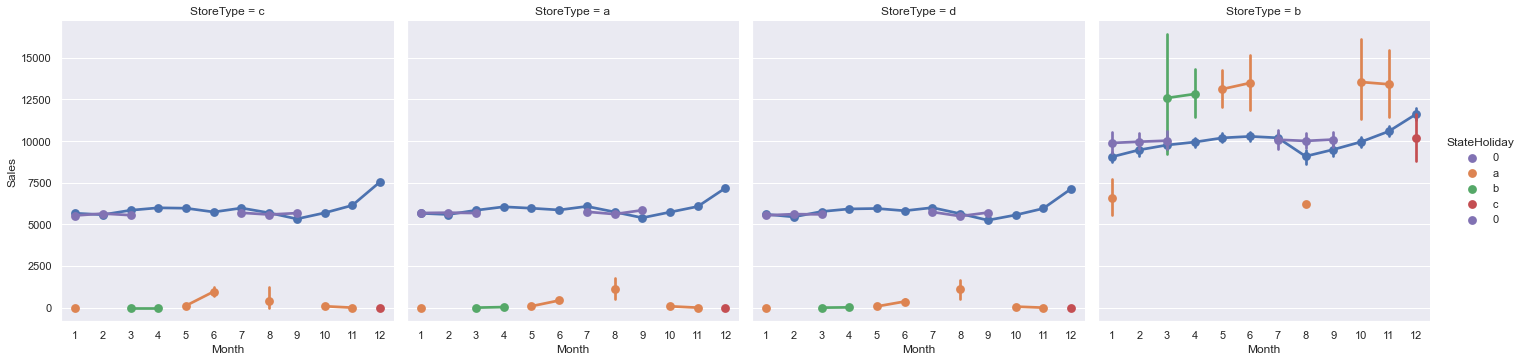

In [130]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',y='Sales',col='StoreType',hue='StateHoliday',sharex=False)


In general we do see state holidays do not do much for the sales or customers.

We however realize that stor type b does benefit from public holidays and Easter Holidays alot.We could run promos during this time and hopefully increase sales that we do get

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

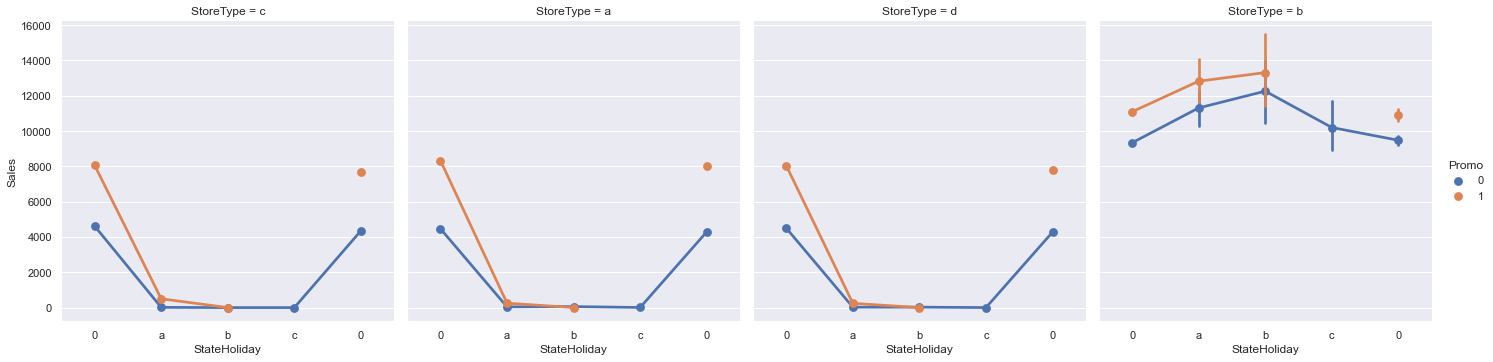

In [135]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='StateHoliday',col='StoreType',y='Sales',hue='Promo',sharex=False)


* We notice that no store runs promos on chrismas, this might be due to them being closed during the holiday.
* Holding promos during the holidays gives a slight boost of sales during the holidays

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

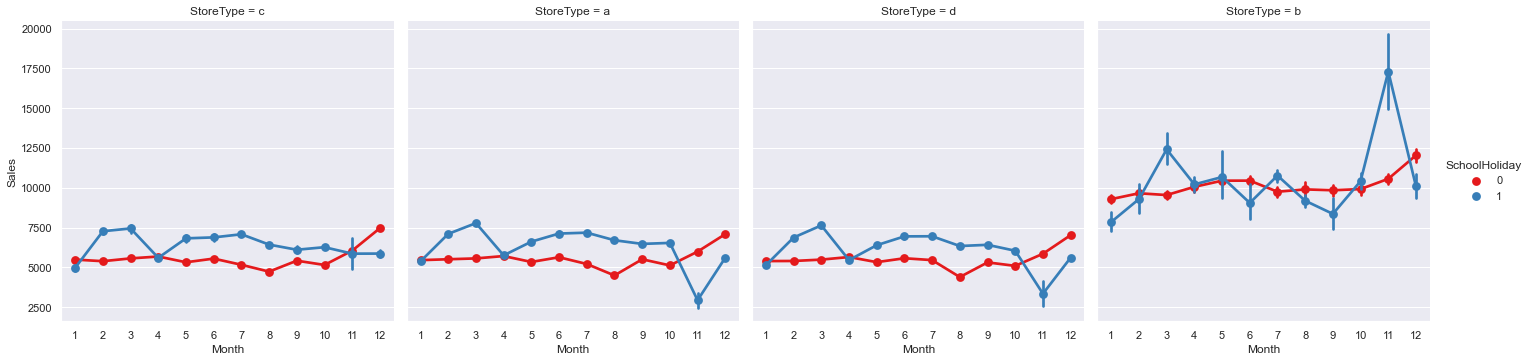

In [137]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',col='StoreType',y='Sales',hue='SchoolHoliday',sharex=False,palette='Set1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

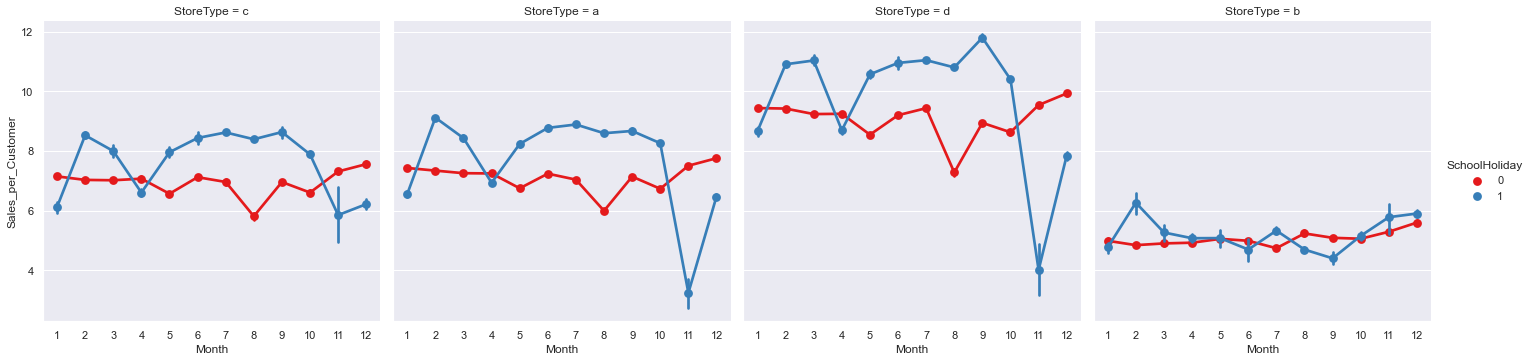

In [138]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',col='StoreType',y='Sales_per_Customer',hue='SchoolHoliday',sharex=False,palette='Set1')

In general we note that most of the stores record increase in sales during school holidays especially store type b 

* However as experienced before store type b had the least sales per customer of the storetypes, it hoowever still benefited from school holidays

* We also note that on the 4th Month (April) sales do drop in even in the presence of a school holiday

### Holidays vs Assortments

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

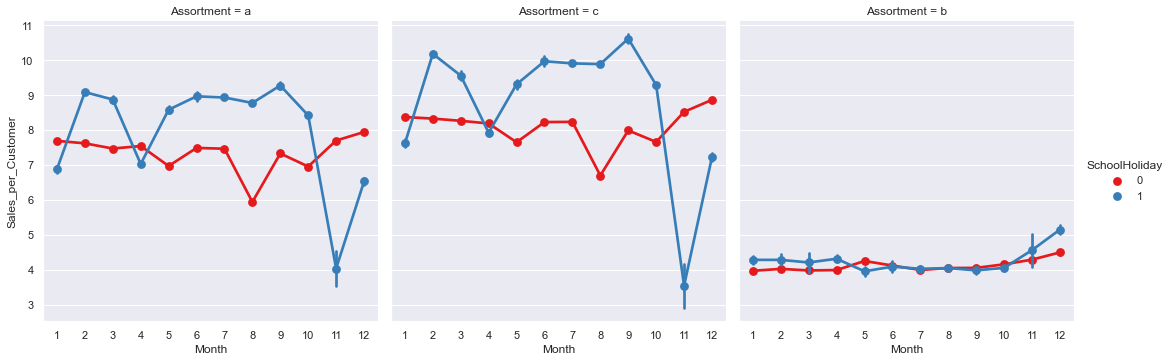

In [139]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='Month',col='Assortment',y='Sales_per_Customer',hue='SchoolHoliday',sharex=False,palette='Set1')

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


<Figure size 720x648 with 0 Axes>

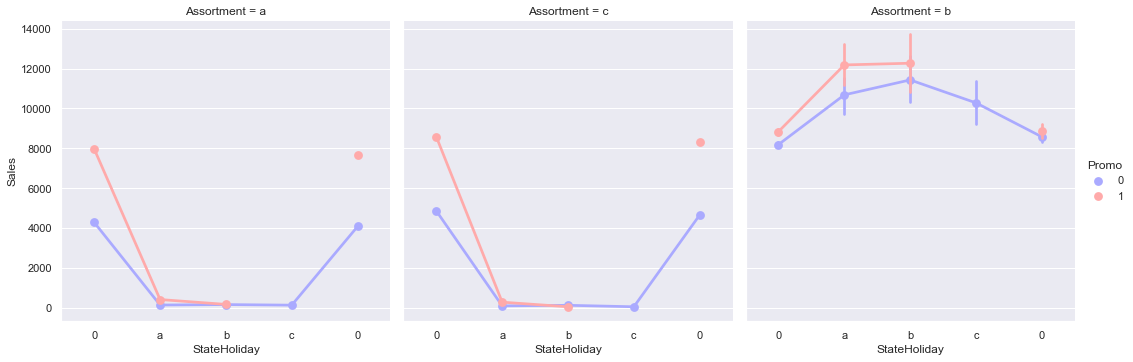

In [140]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='StateHoliday',col='Assortment',y='Sales',hue='Promo',sharex=False,palette='bwr')


### Public vs School Holidays

In [146]:
train.groupby(['StateHoliday','SchoolHoliday']).agg({'Sales':sum,
                                                        'Sales_per_Customer':sum,
                                                        'Customers':sum})

Sales  Sales_per_Customer  Customers
StateHoliday SchoolHoliday                                           
0            0               544107318           764611.78   61474209
             1               207398008           278696.62   22697100
             0              4146934207          5685317.47  453783458
             1               966725235          1280631.80  104843228
a            0                 5010319             4522.80     747007
             1                  879986              707.87     140739
b            0                  208687               41.11      30457
             1                 1225057              875.43     214142
c            1                  691806              445.15     111415

### Distance to competitor vs Sales

Does the distance affact the sales of a certain store 

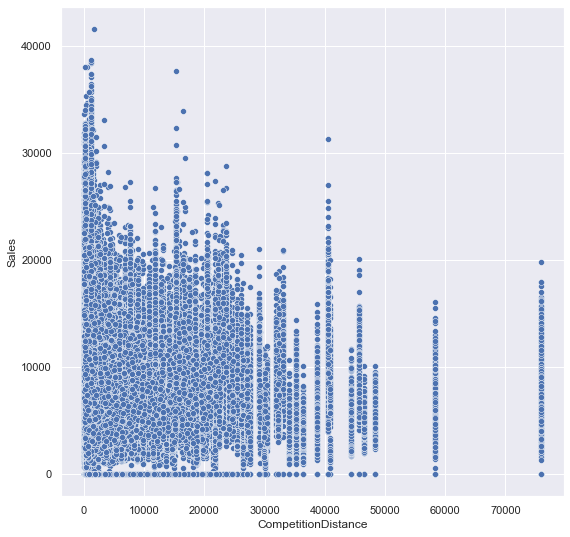

In [148]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='CompetitionDistance',y='Sales',data=train)

In [149]:
stats.pearsonr(train['CompetitionDistance'], traindata.Sales)[0]

-0.018869273832531522

From the above we see a slight negative pearsons correlation. So it seems the closer your competetion the more the sales 

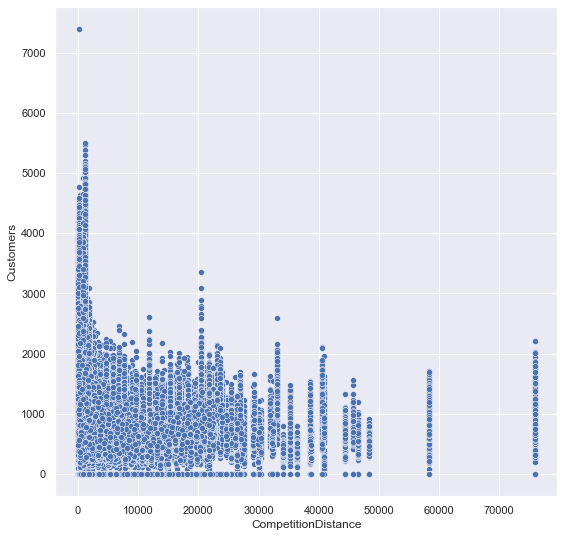

In [150]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='CompetitionDistance',y='Customers',data=train)

Seems there also exists a negative correlation between competitiondistance and customers

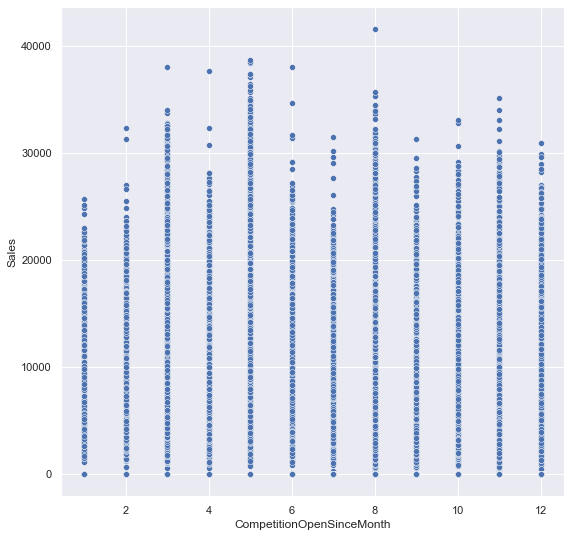

In [151]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='CompetitionOpenSinceMonth',y='Sales',data=train)

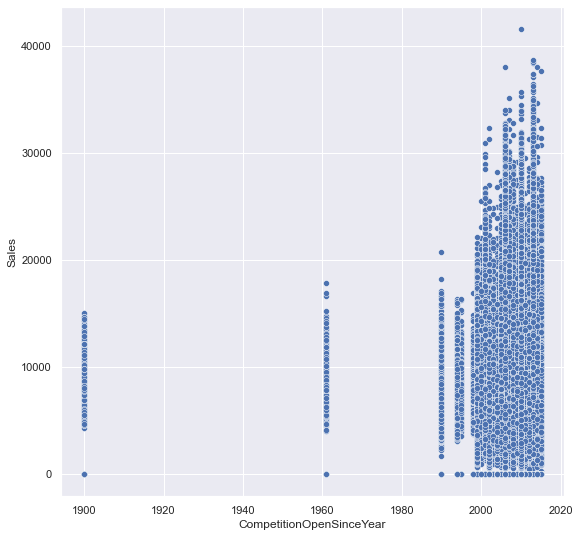

In [152]:
plt.figure(figsize=(9,9))
sns.scatterplot(x='CompetitionOpenSinceYear',y='Sales',data=train)

If the competition was open recently the store experiences more sales 

C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3714: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\ProgramData\Anaconda3\lib\site-packages\seaborn\categorical.py:3803: UserWarning: Setting `sharex=False` with `color=None` may cause different levels of the `x` variable to share colors. This will change in a future version.
  warnings.warn(msg.format("sharex", "x"), UserWarning)


<Figure size 720x648 with 0 Axes>

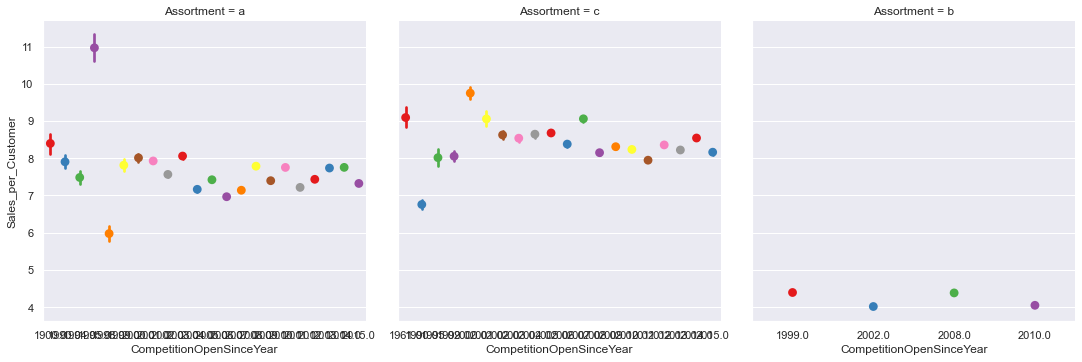

In [153]:
plt.figure(figsize=(10,9))
sns.factorplot(data=train,x='CompetitionOpenSinceYear',col='Assortment',y='Sales_per_Customer',sharex=False,palette='Set1')